In [1]:
import time

import ase
from ase.visualize import view

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

from molnet.data.utils import _create_one_atom_position_map_np, get_image_and_atom_map_np

from molnet.data.f90 import atom_map_computation


In [14]:
t0 = time.time()
x, y, xyz = get_image_and_atom_map_np(
    fname="/l/data/small_fragments/afm.h5",
    atomic_numbers=[1, 6, 7, 8, 17],
    index=0,
    split="train",
    z_cutoff=2.5,
    map_resolution=0.125,
    sigma=0.2
)
print("Time to load data: ", time.time() - t0)

print(x.shape, y.shape, xyz.shape)

Time to load data:  0.1312408447265625
(128, 128, 10) (5, 128, 128, 26) (20, 5)


In [3]:
mol = ase.Atoms(
    numbers=xyz[:, -1].astype(int),
    positions=xyz[:, :3]
)

view(mol)

<Popen: returncode: None args: ['/u/79/kurkil1/unix/.venvs/tf-2.13/bin/pytho...>

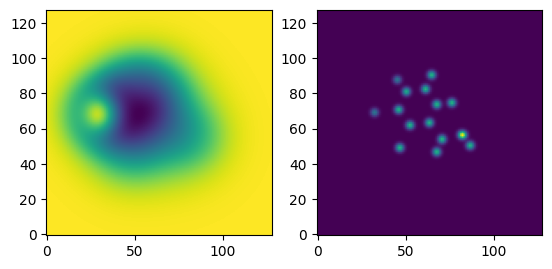

In [4]:
ax = plt.subplot(121)
ax.imshow(x[:, :, 0], origin="lower")

ax = plt.subplot(122)
ax.imshow(y.sum(axis=(0,-1)), origin="lower")

In [21]:
import numpy as np
from molnet.data.f90 import atom_map_computation

volume_size = np.array([128, 128, 25])
width, height, depth = volume_size

# Create grids using numpy
z = np.arange(depth, dtype=np.float32)
y = np.arange(height, dtype=np.float32)
x = np.arange(width, dtype=np.float32)
x_grid, y_grid, z_grid = np.meshgrid(x, y, z, indexing='ij')

maps = np.zeros_like(x_grid, dtype=np.float32)

In [22]:
print(atom_map_computation.generate_gaussian_volume.__doc__)

generate_gaussian_volume(coords,n_coords,x_grid,y_grid,z_grid,sigma,volume)

Wrapper for ``generate_gaussian_volume``.

Parameters
----------
coords : input rank-2 array('f') with bounds (f2py_coords_d0,f2py_coords_d1)
n_coords : input int
x_grid : input rank-3 array('f') with bounds (f2py_x_grid_d0,f2py_x_grid_d1,f2py_x_grid_d2)
y_grid : input rank-3 array('f') with bounds (f2py_y_grid_d0,f2py_y_grid_d1,f2py_y_grid_d2)
z_grid : input rank-3 array('f') with bounds (f2py_z_grid_d0,f2py_z_grid_d1,f2py_z_grid_d2)
sigma : input float
volume : input rank-3 array('f') with bounds (f2py_volume_d0,f2py_volume_d1,f2py_volume_d2)



In [27]:
t0 = time.time()

atom_map_computation.generate_gaussian_volume(
    xyz, xyz.shape[0], x_grid, y_grid, z_grid, 0.5, maps
)

t1 = time.time()
print("Time to compute atom maps: ", t1 - t0)

Time to compute atom maps:  0.11458516120910645


In [19]:
print(maps.shape)

(128, 128, 10)
